In [21]:
import pandas as pd
import numpy as np

In [29]:
dk = pd.read_csv('Moonlanding.csv',encoding='latin-1')

In [30]:
dk.head()

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
0,Pioneer 0 (Able I),Pioneer 0,17-Aug-58,Thor DM-18 Able I,United States USAF,Orbiter,Launch failure,First attempted launch beyond Earth orbit; fai...
1,Luna E-1 No.1,Luna E-1 No.1,23-Sep-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; rocket disintegrated due to e...
2,Pioneer 1 (Able II),Pioneer 1,11-Oct-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...
3,Luna E-1 No.2,Luna E-1 No.2,11-Oct-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; carrier rocket exploded due t...
4,Pioneer 2 (Able III),Pioneer 2,08-Nov-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...


In [31]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Mission                 158 non-null    object
 1   Spacecraft              158 non-null    object
 2   Launch Date             158 non-null    object
 3   Carrier Rocket          158 non-null    object
 4   Operator                158 non-null    object
 5   Mission Type            158 non-null    object
 6   Outcome                 158 non-null    object
 7   Additional Information  157 non-null    object
dtypes: object(8)
memory usage: 10.0+ KB


In [32]:
dk.describe().T

,count,unique,top,freq
Mission,158,147,Chang'e 5,4
Spacecraft,158,158,Pioneer 0,1
Launch Date,158,124,16-Nov-22,11
Carrier Rocket,158,51,Proton-K/D,24
Operator,158,22,United States NASA,61
Mission Type,158,13,Orbiter,59
Outcome,158,6,Successful,78
Additional Information,157,151,Returned lunar samples on 16 December 2020. Or...,4


In [33]:
dk.describe().T.style.background_gradient()

,count,unique,top,freq
Mission,158,147,Chang'e 5,4
Spacecraft,158,158,Pioneer 0,1
Launch Date,158,124,16-Nov-22,11
Carrier Rocket,158,51,Proton-K/D,24
Operator,158,22,United States NASA,61
Mission Type,158,13,Orbiter,59
Outcome,158,6,Successful,78
Additional Information,157,151,Returned lunar samples on 16 December 2020. Orbiter is in a distant retrograde orbit around the Moon.,4


In [36]:
dk.shape

(158, 8)

In [37]:
df.dtypes

Mission                   object
Spacecraft                object
Launch Date               object
Carrier Rocket            object
Operator                  object
Mission Type              object
Outcome                   object
Additional Information    object
dtype: object

In [38]:
df.dropna(inplace=True)

In [39]:
df.shape

(157, 8)

In [40]:
df.isnull().sum()

Mission                   0
Spacecraft                0
Launch Date               0
Carrier Rocket            0
Operator                  0
Mission Type              0
Outcome                   0
Additional Information    0
dtype: int64

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotblib inline
sns.set_style('darkgrid')

UsageError: Line magic function `%matplotblib` not found.


In [42]:
df.columns

Index(['Mission', 'Spacecraft', 'Launch Date', 'Carrier Rocket', 'Operator',
       'Mission Type', 'Outcome', 'Additional Information'],
      dtype='object')

In [44]:
df['Mission'].value_counts()

Chang'e 5               4
GRAIL                   2
Hiten                   2
Chang'e 4               2
Chang'e 3               2
                       ..
Surveyor 4              1
Explorer 35 (AIMP-E)    1
Lunar Orbiter 5         1
Surveyor 5              1
Luna 25                 1
Name: Mission, Length: 147, dtype: int64

In [46]:
df[df['Mission'] == "Chang'e 5"]

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
134,Chang'e 5,Chang'e 5 Orbiter,23-Nov-20,Long March 5,China CNSA,Orbiter,Operational,Returned lunar samples on 16 December 2020. Or...
135,Chang'e 5,Chang'e 5 Lander,23-Nov-20,Long March 5,China CNSA,Lander,Successful,Returned lunar samples on 16 December 2020. Or...
136,Chang'e 5,Chang'e 5 Ascender,23-Nov-20,Long March 5,China CNSA,Launch Vehicle,Successful,Returned lunar samples on 16 December 2020. Or...
137,Chang'e 5,Chang'e 5 Returner,23-Nov-20,Long March 5,China CNSA,Sample Return,Successful,Returned lunar samples on 16 December 2020. Or...


In [47]:
df['Mission Type'].value_counts()

Orbiter                            58
Lander                             38
Flyby                              31
Impactor                           15
Rover                               4
Orbiter,Lander,Rover                2
Lander,Sample Return                2
Flybys                              2
Crewed orbiter                      1
Flyby / Impactor (post mission)     1
Relay Satellite                     1
Launch Vehicle                      1
Sample Return                       1
Name: Mission Type, dtype: int64

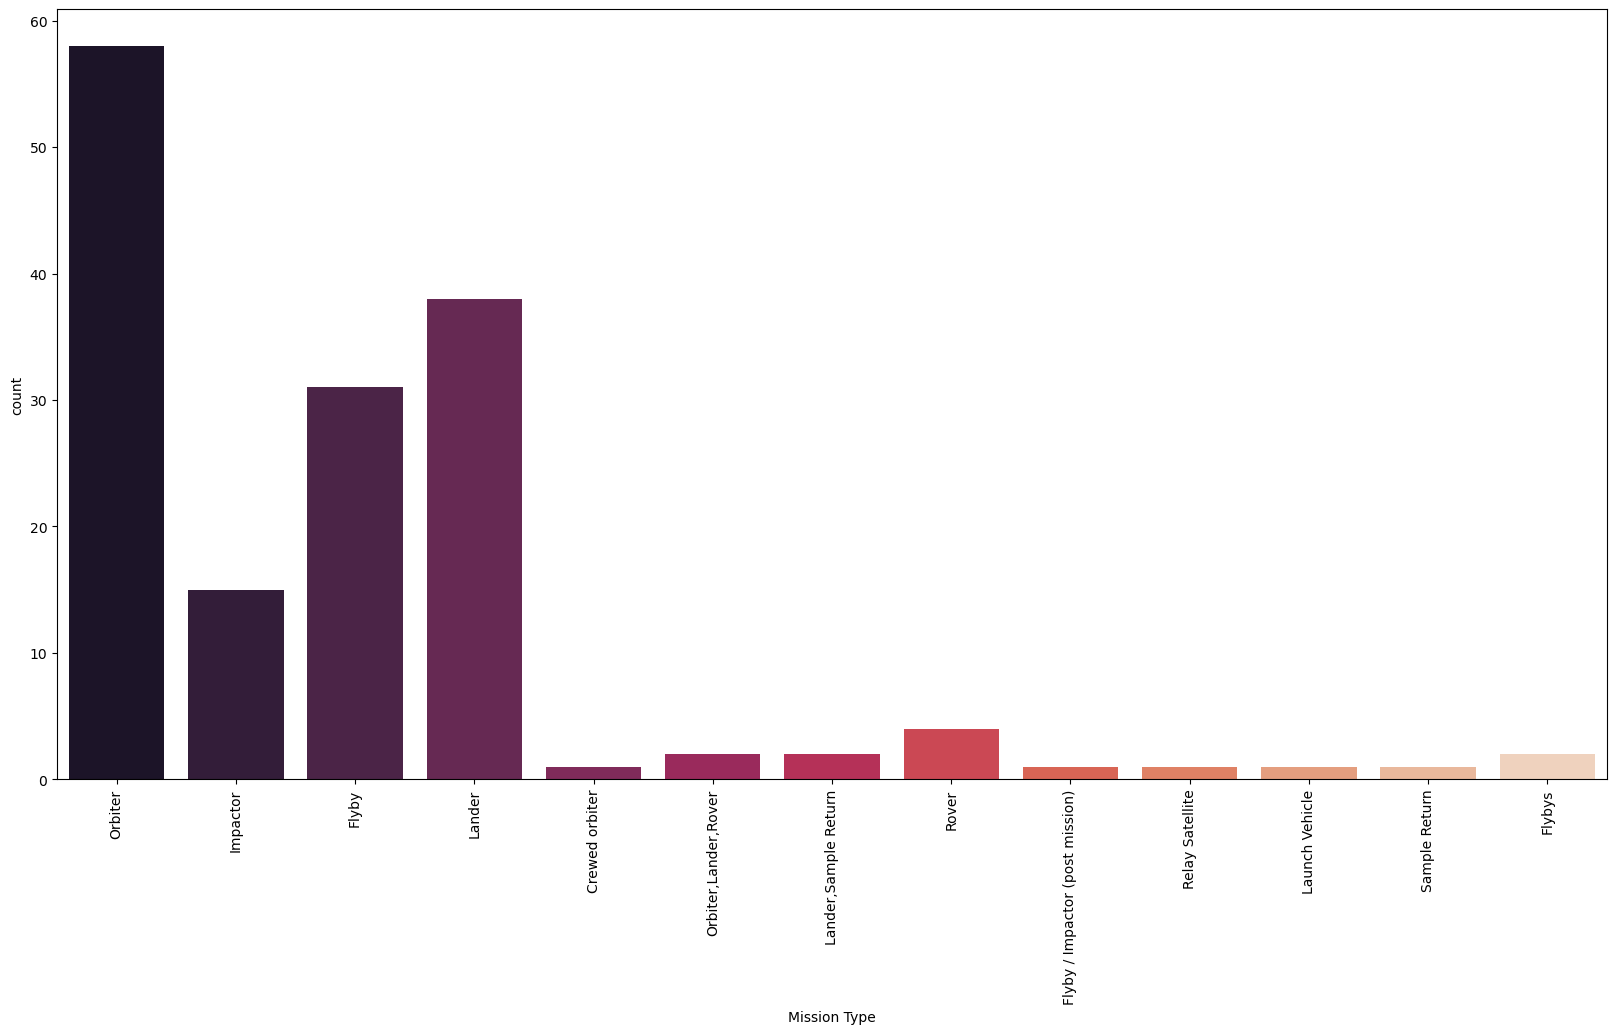

In [49]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x=df['Mission Type'], palette='rocket')
plt.xlabel('Mission Type')
plt.xticks(rotation=90)
plt.show()

In [51]:
pd.DataFrame(df.groupby(['Operator']).count()['Mission'].sort_values(ascending=False))

,Mission
Operator,
United States NASA,61
Soviet Union Lavochkin,39
China CNSA,15
Soviet Union OKB-1,15
India ISRO,4
Japan JAXA,4
Japan ISAS,3
European Union ESA,2
United States USAF,1


In [52]:
label = df['Operator'].unique()

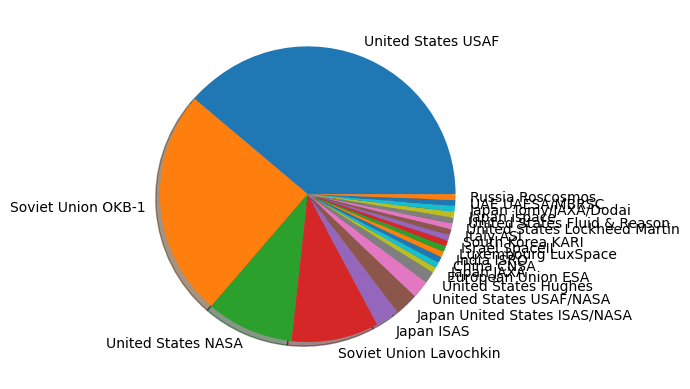

In [53]:
plt.pie(df['Operator'].value_counts(10), labels=label, shadow=True)
plt.show()

In [54]:
df['Outcome'].value_counts()

Successful            77
Launch failure        31
Spacecraft failure    28
Operational           14
Partial failure        6
En route               1
Name: Outcome, dtype: int64

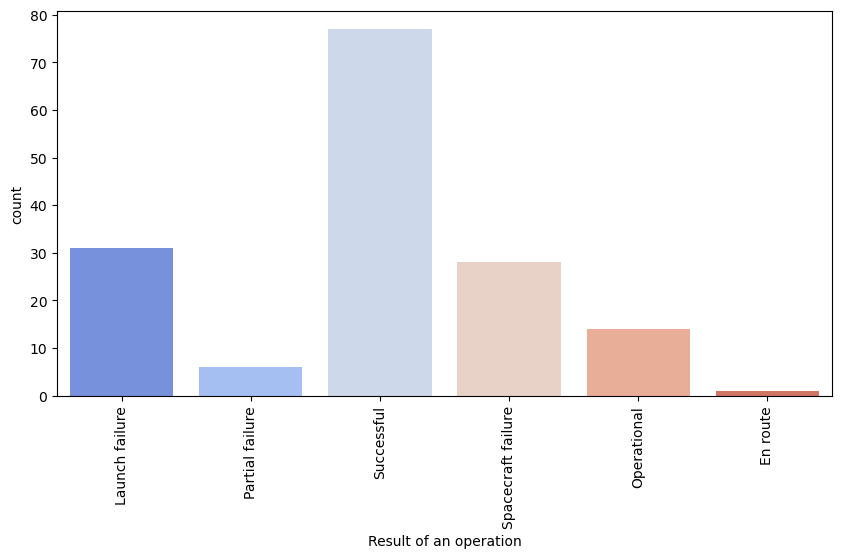

In [57]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x = df['Outcome'],palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Result of an operation')
plt.show()

In [58]:
df.head()

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
0,Pioneer 0 (Able I),Pioneer 0,17-Aug-58,Thor DM-18 Able I,United States USAF,Orbiter,Launch failure,First attempted launch beyond Earth orbit; fai...
1,Luna E-1 No.1,Luna E-1 No.1,23-Sep-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; rocket disintegrated due to e...
2,Pioneer 1 (Able II),Pioneer 1,11-Oct-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...
3,Luna E-1 No.2,Luna E-1 No.2,11-Oct-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; carrier rocket exploded due t...
4,Pioneer 2 (Able III),Pioneer 2,08-Nov-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...


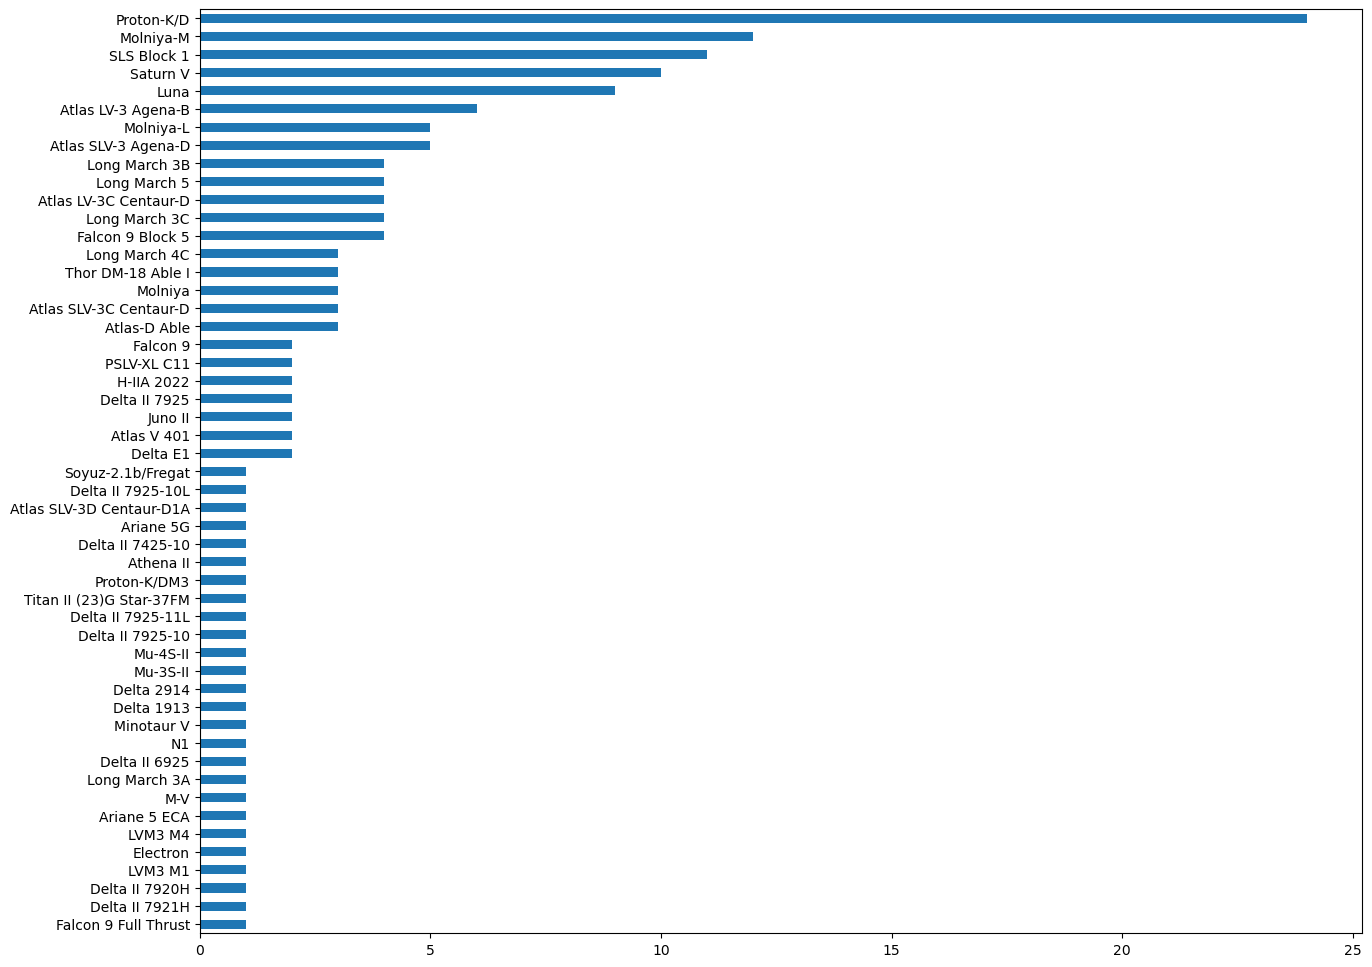

In [59]:
plt.figure(figsize=(15,12))
df['Carrier Rocket'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.show()

In [60]:
df['Launch Date'] = df['Launch Date'].str.replace('-','/')

In [61]:
df.head()

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
0,Pioneer 0 (Able I),Pioneer 0,17/Aug/58,Thor DM-18 Able I,United States USAF,Orbiter,Launch failure,First attempted launch beyond Earth orbit; fai...
1,Luna E-1 No.1,Luna E-1 No.1,23/Sep/58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; rocket disintegrated due to e...
2,Pioneer 1 (Able II),Pioneer 1,11/Oct/58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...
3,Luna E-1 No.2,Luna E-1 No.2,11/Oct/58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; carrier rocket exploded due t...
4,Pioneer 2 (Able III),Pioneer 2,08/Nov/58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...


In [62]:
df[df['Operator']== 'India ISRO']

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
113,Chandrayaan-1,Chandrayaan-1,22/Oct/08,PSLV-XL C11,India ISRO,Orbiter,Successful,"Moon Impact Probe deployed, discovered water i..."
114,Chandrayaan-1,Moon Impact Probe,22/Oct/08,PSLV-XL C11,India ISRO,Impactor,Successful,"Moon Impact Probe deployed, discovered water i..."
133,Chandrayaan-2,Chandrayaan-2 Orbiter,22/Jul/19,LVM3 M1,India ISRO,Orbiter,Operational,"Orbiter operational, but Lander and Rover were..."
156,Chandrayaan-3,Chandrayaan-3,14/Jul/23,LVM3 M4,India ISRO,Orbiter,Operational,Lander and rover operational. Soft-landed near...
